<div align="left">
<p><img alt="Sapiencia" height="140px" src="https://ubicua.ingeniaudea.co/pluginfile.php/32974/coursecat/description/RF_RedesNeuronales.png" align="left" hspace="10px" vspace="0px"></p></div>
<div align="left"></div>
<div>

<br></br>

<div align="left">
<br></br>
<br></br>



<hr size=10 noshade color="#663398">
</p>

<div align="right">
<h1> <b> Trabajo final redes neuronales </b> </h1>
<br>


**El presente material hace parte de la ruta de formación del talento especializado de SAPIENCIA**

**Los documentos que utilizaremos en la presente y proximas clases son una mezcla del trabajo de muchos profesores y académicos.**

**En caso de utilizar el presente contenido favor citarlo y brindar los créditos respectivos.**

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


---

In [25]:
#%pip install tensorflow keras pandas matplotlib

In [26]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [27]:
tensorboardDenso = TensorBoard(log_dir ='logs/denso')

In [28]:
def crear_modelo(neuronas_por_capa=512,
                        numero_capas_internas=1,
                        funcion_activacion_capas_internas = 'relu',
                        funcion_activacion_capa_salida=['softmax'],
                        neuronas_entrada = 28*28,
                        optimizador='rmsprop',
                        funcion_perdida='categorical_crossentropy',
                        metricas = ['accuracy', 'Precision']
                        ):
    
    model = models.Sequential()
    model.add(layers.Dense(neuronas_por_capa,activation=funcion_activacion_capas_internas, input_shape=(neuronas_entrada,)))

    while(numero_capas_internas>1):
        model.add(layers.Dense(neuronas_por_capa,activation=funcion_activacion_capas_internas))
        numero_capas_internas= numero_capas_internas-1
    
    model.add(layers.Dense(10,activation=funcion_activacion_capa_salida))

    model.compile(optimizer=optimizador,
                loss=funcion_perdida,
                metrics= metricas)
    model.summary()

    return model

In [29]:
def transformar_dataset(train_data,test_data,train_labels,test_labels,tamaño_imagen = 28*28):

    x_train = train_data.reshape((train_data.shape[0],tamaño_imagen))
    x_train = x_train.astype('float32')/255

    x_test = test_data.reshape((test_data.shape[0],tamaño_imagen))
    x_test = x_test.astype('float32')/255

    # transformar labels de array categorico a arrays de bits
    y_train = to_categorical(train_labels)
    y_test =to_categorical(test_labels)

    return x_train,y_train, x_test,y_test

In [30]:
def entrenar_modelo(x_train,y_train,x_test, y_test,model, epocas=20,batch_size=128):
    #asegurar que todos los datos de entrada sean de tipo numpy array
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    history = model.fit(x_train, y_train, epochs=epocas,callbacks=[tensorboardDenso], batch_size=batch_size, validation_data=(x_test, y_test))
    return history,model

In [31]:
def evaluar_modelo(model,history,x_test, y_test,titulo):
    
    pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel("epochs")
    plt.show()

    metricas = model.evaluate(x_test, y_test)
    print("**************************metricas******************************************")
    print(f"""
    loss = {metricas[0]}
    accuracy = {metricas[1]}
    precision = {metricas[2]}
    """)
    return metricas

# Variacion de parametros

## 1. Cantidad de neuronas

In [32]:
lista_neuronas = [512,256,128,64]
funcion_activacion_capas_internas = 'relu'
funcion_activacion_salida = 'softmax'
valor_neuronas_entrada = 28*28

In [33]:
#cargar dataset
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
#transformar datos
x_train,y_train, x_test,y_test = transformar_dataset(train_data,test_data,train_labels,test_labels,28*28)

*********************************** Numero Neuronas: 512***********************************
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.2648 - accuracy: 0.9240 - precision: 0.9522 - val_loss: 0.1379 - val_accuracy: 0.9601 - val_precision: 0.9678
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1076 - accuracy: 0.9682 - precision: 0.9744 - val_loss: 0.

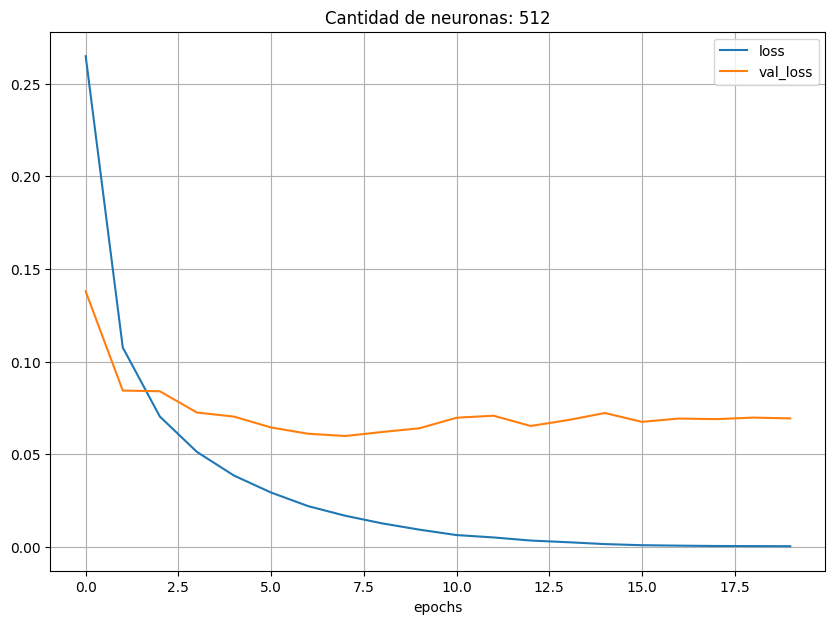

313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9834 - precision: 0.9840
**************************metricas******************************************

    loss = 0.06932181119918823
    accuracy = 0.9833999872207642
    precision = 0.9839839935302734
    
*********************************** Numero Neuronas: 256***********************************
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [=====

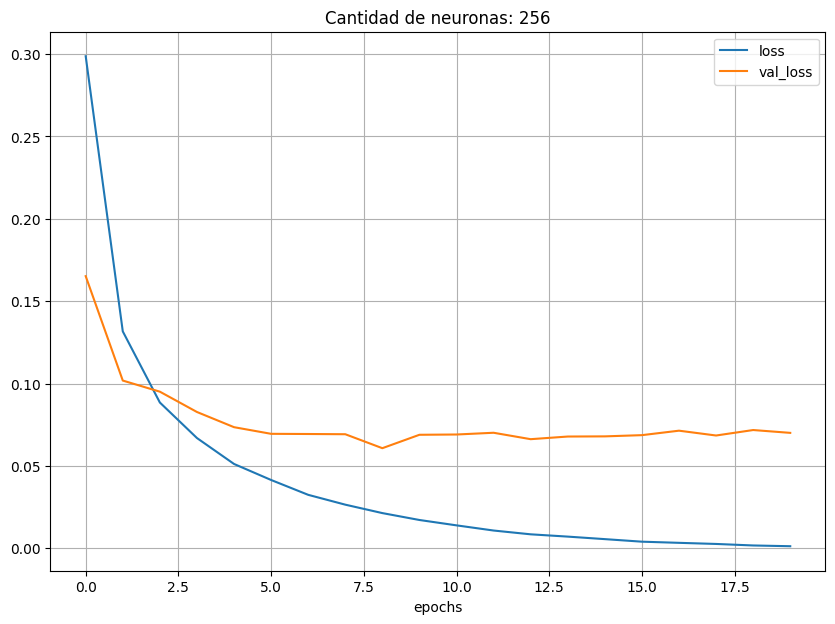

313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9829 - precision: 0.9836
**************************metricas******************************************

    loss = 0.07008687406778336
    accuracy = 0.9829000234603882
    precision = 0.9835819602012634
    
*********************************** Numero Neuronas: 128***********************************
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [=====

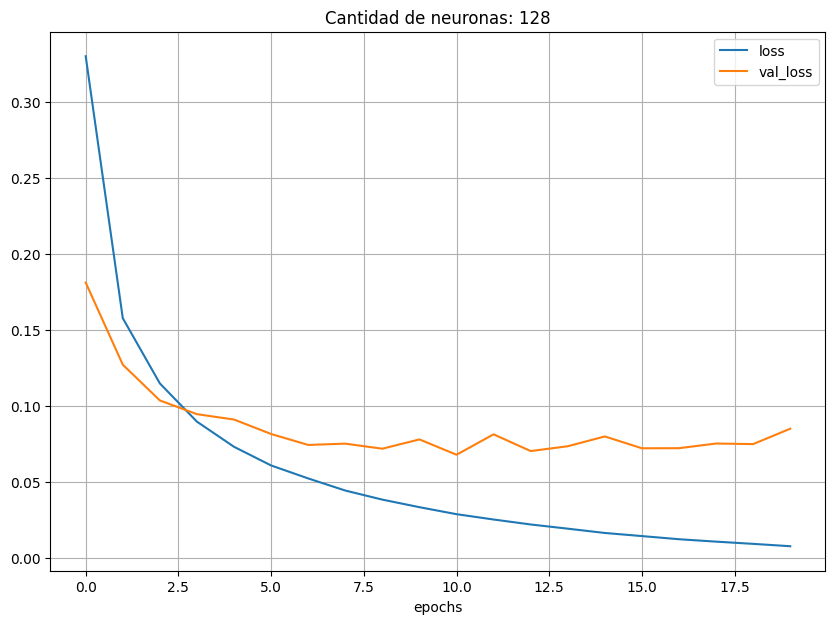

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9791 - precision: 0.9804
**************************metricas******************************************

    loss = 0.08506308495998383
    accuracy = 0.9790999889373779
    precision = 0.9803627133369446
    
*********************************** Numero Neuronas: 64***********************************
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [========

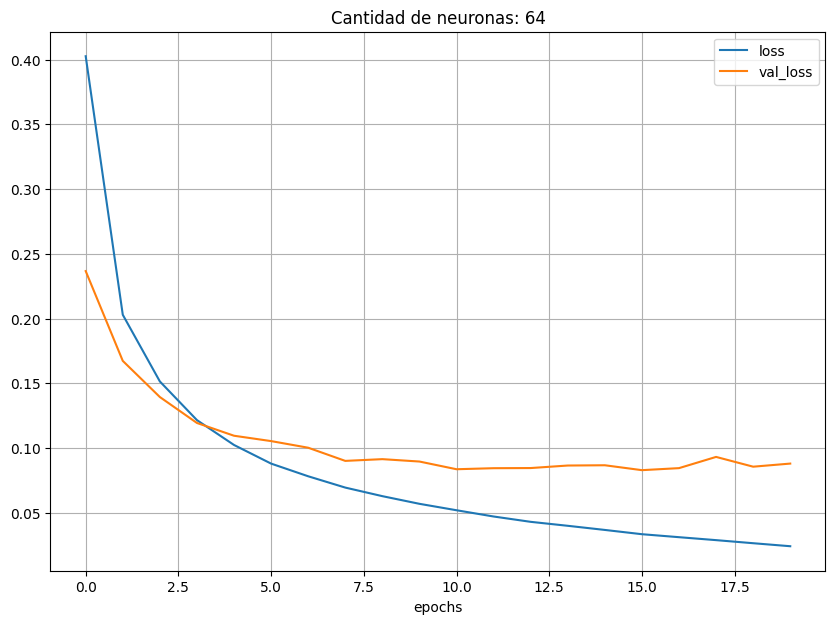

313/313 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9762 - precision: 0.9773
**************************metricas******************************************

    loss = 0.08798769116401672
    accuracy = 0.9761999845504761
    precision = 0.9773365259170532
    


In [34]:
modelos_cantidad_neuronas = {}
for n in lista_neuronas:
    print(f"*********************************** Numero Neuronas: {n}***********************************")
    #crear modelo
    modelo = crear_modelo(neuronas_por_capa=n,
                            numero_capas_internas=1,
                            funcion_activacion_capas_internas = 'relu',
                            funcion_activacion_capa_salida='softmax',
                            neuronas_entrada = valor_neuronas_entrada,
                            optimizador='rmsprop',
                            funcion_perdida='categorical_crossentropy',
                            metricas = ['accuracy', 'Precision']
                            )
    #entrenar modelo

    registros_entrenamiento,modelo_entrenado= entrenar_modelo(x_train,y_train, x_test, y_test,modelo, 20, 128)

    #evaluar resultado
    titulo=f"Cantidad de neuronas: {n}"
    metricas = evaluar_modelo(modelo_entrenado,registros_entrenamiento,x_test, y_test,titulo)
    llave = f"modelo_{n}"
    modelos_cantidad_neuronas[llave] = metricas

## 2. Tipo de optimizador

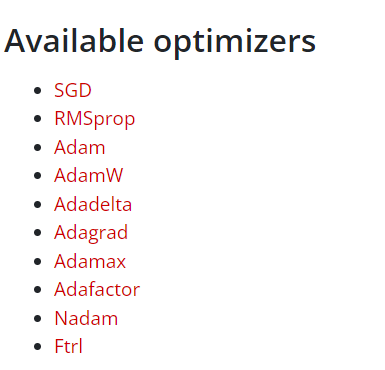

*********************************** optimizador: rmsprop***********************************
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               401920    
                                                                 
 dense_39 (Dense)            (None, 10)                5130      


                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2667 - accuracy: 0.9231 - precision: 0.9511 - val_loss: 0.1285 - val_accuracy: 0.9626 - val_precision: 0.9706
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1070 - accuracy: 0.9688 - precision: 0.9747 - val_loss: 0.0862 - val_accuracy: 0.9741 - val_precision: 0.9786
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0698 - accuracy: 0.9793 - precision: 0.9823 - val_loss: 0.0875 - val_accuracy: 0.9724 - val_precision: 0.9759
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0512 - accuracy: 0.9845 - precision: 0.9871 - val_loss: 0.0687 - val_accuracy: 0.9789 - val_precision: 0.9821
Epoch 5/20
469/469

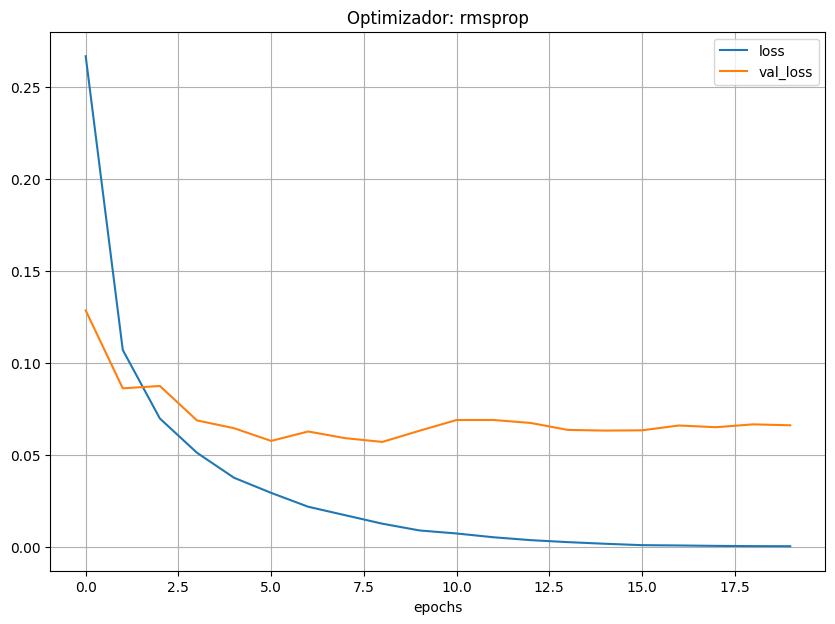

313/313 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9837 - precision: 0.9841
**************************metricas******************************************

    loss = 0.06607604026794434
    accuracy = 0.9836999773979187
    precision = 0.9840904474258423
    
*********************************** optimizador: sgd***********************************
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [=============

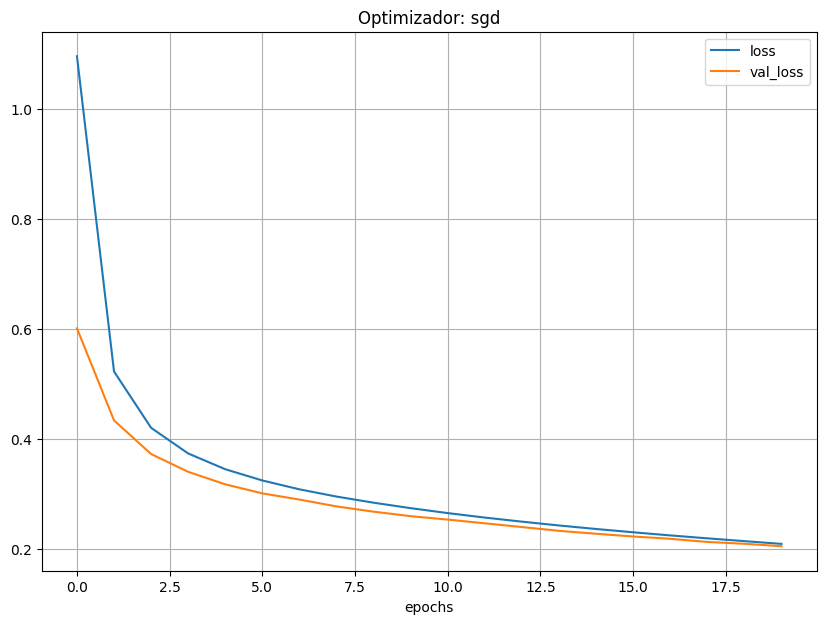

313/313 [==============================] - 1s 4ms/step - loss: 0.2055 - accuracy: 0.9415 - precision: 0.9585
**************************metricas******************************************

    loss = 0.2054828554391861
    accuracy = 0.9415000081062317
    precision = 0.958540141582489
    
*********************************** optimizador: adam***********************************
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============

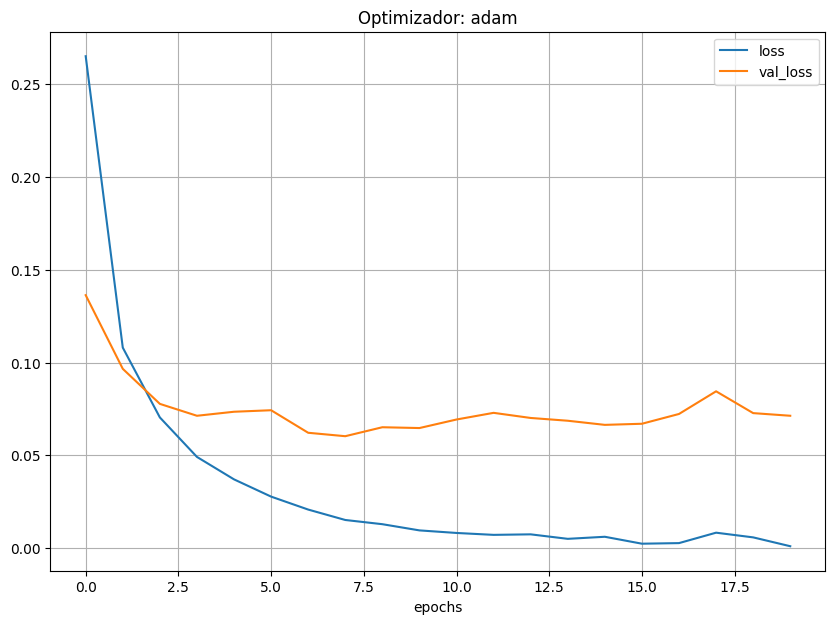

313/313 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9843 - precision: 0.9846
**************************metricas******************************************

    loss = 0.07133474200963974
    accuracy = 0.9843000173568726
    precision = 0.9845892190933228
    
*********************************** optimizador: adadelta***********************************
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [========

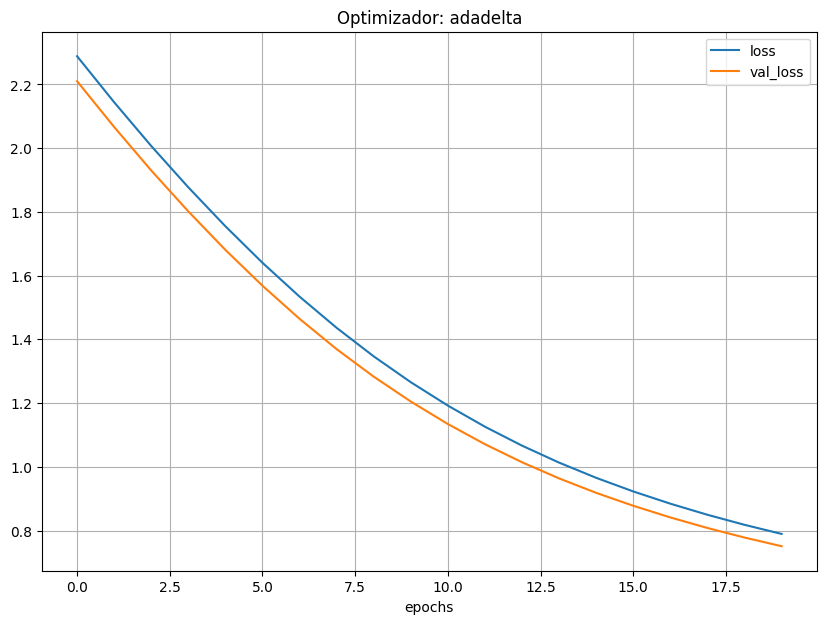

313/313 [==============================] - 1s 4ms/step - loss: 0.7509 - accuracy: 0.8471 - precision: 0.9779
**************************metricas******************************************

    loss = 0.7509178519248962
    accuracy = 0.847100019454956
    precision = 0.9779099225997925
    
*********************************** optimizador: ftrl***********************************
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 512)               401920    
                                                                 
 dense_47 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============

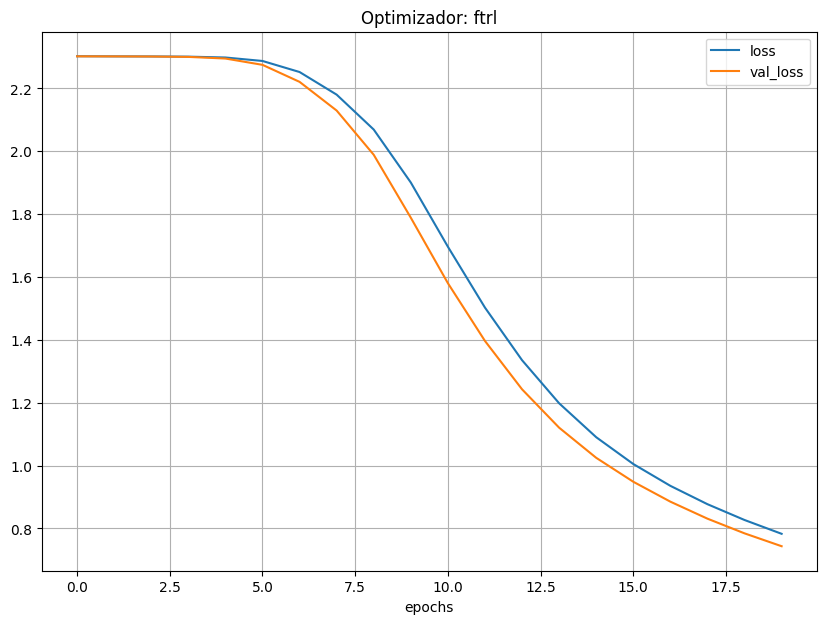

313/313 [==============================] - 1s 4ms/step - loss: 0.7433 - accuracy: 0.7932 - precision: 0.9343
**************************metricas******************************************

    loss = 0.7432635426521301
    accuracy = 0.7932000160217285
    precision = 0.9342829585075378
    


In [38]:
modelos_optimizador= {}
lista_optimizador= ['rmsprop','sgd','adam','adadelta','ftrl']
n= 512

for optimizador in lista_optimizador:
    print(f"*********************************** optimizador: {optimizador}***********************************")
    #crear modelo
    modelo = crear_modelo(neuronas_por_capa=n,
                            numero_capas_internas=1,
                            funcion_activacion_capas_internas = 'relu',
                            funcion_activacion_capa_salida='softmax',
                            neuronas_entrada = valor_neuronas_entrada,
                            optimizador=optimizador,
                            funcion_perdida='categorical_crossentropy',
                            metricas = ['accuracy', 'Precision']
                            )
    #entrenar modelo

    registros_entrenamiento,modelo_entrenado= entrenar_modelo(x_train,y_train, x_test, y_test,modelo, 20, 128)

    #evaluar resultado
    titulo=f"Optimizador: {optimizador}"
    metricas = evaluar_modelo(modelo_entrenado,registros_entrenamiento,x_test, y_test,titulo)
    llave = f"modelo_{optimizador}"
    modelos_optimizador[llave] = metricas

## 3. Funciones de activación

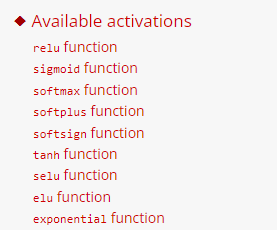

In [ ]:
modelos_funcion_activacion = {}
optimizador = 'rmsprop'
lista_funcion_activacion= ['relu']
n= 512

for fa_capa_interna in lista_funcion_activacion:
    print(f"*********************************** funcion activacion capa interna: {fa_capa_interna}***********************************")
    #crear modelo
    modelo = crear_modelo(neuronas_por_capa=n,
                            numero_capas_internas=1,
                            funcion_activacion_capas_internas = fa_capa_interna,
                            funcion_activacion_capa_salida='softmax',
                            neuronas_entrada = valor_neuronas_entrada,
                            optimizador=optimizador,
                            funcion_perdida='categorical_crossentropy',
                            metricas = ['accuracy', 'Precision']
                            )
    #entrenar modelo

    registros_entrenamiento,modelo_entrenado= entrenar_modelo(x_train,y_train, x_test, y_test,modelo, 20, 128)

    #evaluar resultado
    titulo=f"funcion activacion capa interna: {fa_capa_interna}"
    metricas = evaluar_modelo(modelo_entrenado,registros_entrenamiento,x_test, y_test,titulo)
    llave = f"modelo_{fa_capa_interna}"
    modelos_funcion_activacion[llave] = metricas

## 4. Funciones de perdida

In [ ]:
modelos_loss = {}
optimizador = 'rmsprop'
fa_capas_internas = 'relu'
lista_optimizador= ['rmsprop','sgd','adam','adadelta','ftrl']
n= 512

for optimizador in lista_optimizador:
    print(f"*********************************** optimizador: {optimizador}***********************************")
    #crear modelo
    modelo = crear_modelo(neuronas_por_capa=n,
                            numero_capas_internas=1,
                            funcion_activacion_capas_internas = fa_capas_internas ,
                            funcion_activacion_capa_salida='softmax',
                            neuronas_entrada = valor_neuronas_entrada,
                            optimizador=optimizador,
                            funcion_perdida='categorical_crossentropy',
                            metricas = ['accuracy', 'Precision']
                            )
    #entrenar modelo

    registros_entrenamiento,modelo_entrenado= entrenar_modelo(x_train,y_train, x_test, y_test,modelo, 20, 128)

    #evaluar resultado
    titulo=f"Optimizador: {optimizador}"
    metricas = evaluar_modelo(modelo_entrenado,registros_entrenamiento,x_test, y_test,titulo)
    llave = f"modelo_{n}"
    modelos_loss[llave] = metricas

## 5. Tamaños de entrada de la imagen

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
 %reload_ext tensorboard

In [ ]:
%tensorboard --logdir logs


<IPython.core.display.Javascript object>

In [ ]:
!kill 8369